In [1]:
%load_ext autoreload
%autoreload 2
#Utilizando autoreload para atualizar as funções dos arquivos importados localmente

# Treinamento dos Classificadores utilizando a base de dados digits

In [2]:
from sklearn import datasets
(digits_data, digits_target) = datasets.load_digits(return_X_y=True) #importando a base de dados

### Random Forest

In [3]:
from RandomForest import *
rf = RandomForest()
rf.fit(x = digits_data,y = digits_target)

Treinando Random Forest...
Finalizado!


In [4]:
(rf_mean, rf_std, rf_inf, rf_sup) = rf.results()

### AdaBoost

In [5]:
from AdaBoost import *
adaBoost = AdaBoost()
adaBoost.fit(x = digits_data,y = digits_target)

Treinando AdaBoost...
Finalizado!


In [6]:
(adaBoost_mean, adaBoost_std, adaBoost_inf, adaBoost_sup) = adaBoost.results()

### Bagging

In [7]:
from Bagging import *
bagging = Bagging()
bagging.fit(x = digits_data, y = digits_target)

Treinando Bagging...
Finalizado!


In [8]:
(bagging_mean, bagging_std, bagging_inf, bagging_sup) = bagging.results()

### Heterogeneous Pooling

In [9]:
from HeterogeneousPooling import *
heterogeneousPooling = HeterogeneousPooling()
heterogeneousPooling.fit(x = digits_data, y = digits_target)

Treinando Heterogeneous Pooling...
Finalizado!


In [10]:
(heterogeneousPooling_mean, heterogeneousPooling_std, heterogeneousPooling_inf, heterogeneousPooling_sup) = heterogeneousPooling.results()

### Tabela com resultados

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

digits_table = pd.DataFrame(data={'Média':[bagging_mean, adaBoost_mean, rf_mean, heterogeneousPooling_mean],
                                  'Desvio Padrão':[bagging_std, adaBoost_std, rf_std, heterogeneousPooling_std],
                                  'Limite Inferior':[bagging_inf, adaBoost_inf, rf_inf, heterogeneousPooling_inf],
                                  'Limite Superior':[bagging_sup, adaBoost_sup, rf_sup, heterogeneousPooling_sup]},
                            index=['Bagging', 'AdaBoost', 'RandomForest', 'HeterogeneousPooling'])
digits_table

,Média,Desvio Padrão,Limite Inferior,Limite Superior
Bagging,0.953635,0.014070,0.948601,0.958670
AdaBoost,0.269692,0.022391,0.261679,0.277704
RandomForest,0.975884,0.009246,0.972575,0.979192
HeterogeneousPooling,0.965506,0.012280,0.961111,0.969900


### Boxplot com resultados

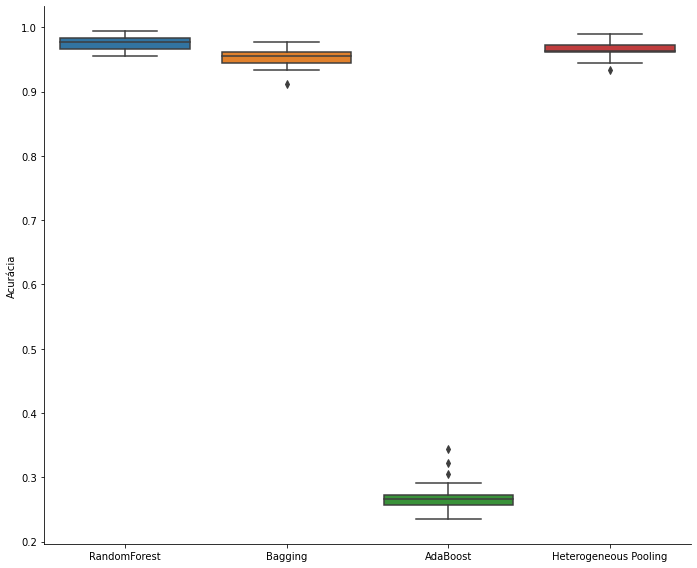

In [12]:
import seaborn as sns
import pandas as pd

scores = pd.DataFrame(data={'RandomForest': rf.getScores(),
                            'Bagging': bagging.getScores(),
                            'AdaBoost': adaBoost.getScores(),
                            'Heterogeneous Pooling': heterogeneousPooling.getScores()})
ax = sns.catplot(data=scores, kind="box", height=8, aspect=1.2)
ax.set(ylabel='Acurácia')

### Testes de hipótese

In [13]:
from scipy.stats import ttest_rel, wilcoxon
import pandas as pd

labels = ['Bagging', 'AdaBoost', 'RandomForest', 'Heterogeneous']
models = [bagging.getScores(), adaBoost.getScores(), rf.getScores(), heterogeneousPooling.getScores()]
p_table = pd.DataFrame(index=range(4),columns=range(4))

for i in range(4):
    for j in range(4):
        if i == j:
            p_table.loc[i, j] = labels[i]
        elif j > i:
            _, p = ttest_rel(models[i], models[j])
            p_table.loc[i, j] = p
        else:
            _, p = wilcoxon(models[i], models[j])
            p_table.loc[i, j] = p
            
p_table.style.applymap(lambda v: '' if type(v) == str or v >= 0.05 else 'font-weight: bold').hide_index()

0,1,2,3
Bagging,0.000000,0.000000,0.001122
0.000002,AdaBoost,0.000000,0.000000
0.000004,0.000002,RandomForest,0.000138
0.001484,0.000002,0.000422,Heterogeneous


# Treinamento dos Classificadores utilizando a base de dados wine

In [140]:
from sklearn import datasets
(wine_data, wine_target) = datasets.load_wine(return_X_y=True) #importando a base de dados

### Random Forest

In [141]:
from RandomForest import *
rf = RandomForest()
rf.fit(x = wine_data,y = wine_target)

Treinando Random Forest...
Finalizado!


In [142]:
(rf_mean, rf_std, rf_inf, rf_sup) = rf.results()

### AdaBoost

In [143]:
from AdaBoost import *
adaBoost = AdaBoost()
adaBoost.fit(x = wine_data,y = wine_target)

Treinando AdaBoost...
Finalizado!


In [144]:
(adaBoost_mean, adaBoost_std, adaBoost_inf, adaBoost_sup) = adaBoost.results()

### Bagging

In [145]:
from Bagging import *
bagging = Bagging()
bagging.fit(x = wine_data, y = wine_target)

Treinando Bagging...
Finalizado!


In [146]:
(bagging_mean, bagging_std, bagging_inf, bagging_sup) = bagging.results()

### Heterogeneous Pooling

In [147]:
from HeterogeneousPooling import *
heterogeneousPooling = HeterogeneousPooling()
heterogeneousPooling.fit(x = wine_data, y = wine_target)

Treinando Heterogeneous Pooling...
Finalizado!


In [148]:
(heterogeneousPooling_mean, heterogeneousPooling_std, heterogeneousPooling_inf, heterogeneousPooling_sup) = heterogeneousPooling.results()

### Tabela com resultados

In [149]:
import pandas as pd

wine_table = pd.DataFrame(data={'Média':[bagging_mean, adaBoost_mean, rf_mean, heterogeneousPooling_mean],
                                  'Desvio Padrão':[bagging_std, adaBoost_std, rf_std, heterogeneousPooling_std],
                                  'Limite Inferior':[bagging_inf, adaBoost_inf, rf_inf, heterogeneousPooling_inf],
                                  'Limite Superior':[bagging_sup, adaBoost_sup, rf_sup, heterogeneousPooling_sup]},
                            index=['Bagging', 'AdaBoost', 'RandomForest', 'HeterogeneousPooling'])
wine_table

,Média,Desvio Padrão,Limite Inferior,Limite Superior
Bagging,0.954902,0.067039,0.930913,0.978891
AdaBoost,0.914161,0.075790,0.887040,0.941282
RandomForest,0.975272,0.041213,0.960525,0.990020
HeterogeneousPooling,0.966122,0.061007,0.944291,0.987953


### Boxplot com resultados

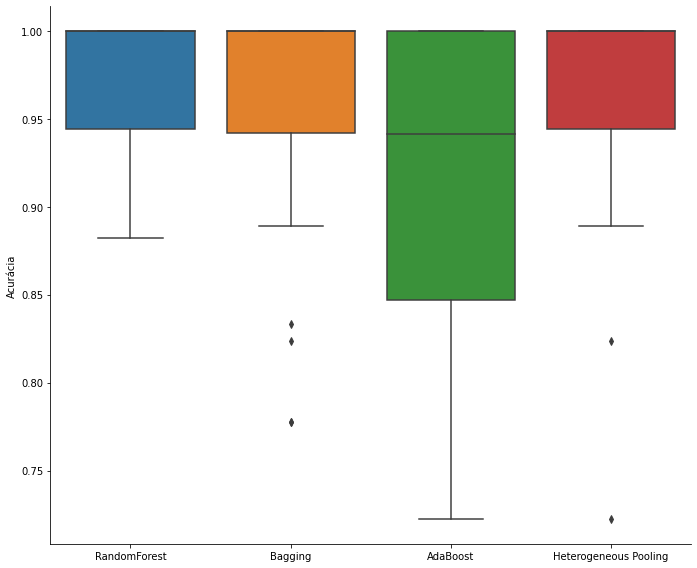

In [150]:
import seaborn as sns
import pandas as pd

scores = pd.DataFrame(data={'RandomForest': rf.getScores(),
                            'Bagging': bagging.getScores(),
                            'AdaBoost': adaBoost.getScores(),
                            'Heterogeneous Pooling': heterogeneousPooling.getScores()})
ax = sns.catplot(data=scores, kind="box", height=8, aspect=1.2)
ax.set(ylabel='Acurácia')

### Testes de hipótese

In [151]:
from scipy.stats import ttest_rel, wilcoxon
import pandas as pd

labels = ['Bagging', 'AdaBoost', 'RandomForest', 'Heterogeneous']
models = [bagging.getScores(), adaBoost.getScores(), rf.getScores(), heterogeneousPooling.getScores()]
p_table = pd.DataFrame(index=range(4),columns=range(4))

for i in range(4):
    for j in range(4):
        if i == j:
            p_table.loc[i, j] = labels[i]
        elif j > i:
            _, p = ttest_rel(models[i], models[j])
            p_table.loc[i, j] = p
        else:
            _, p = wilcoxon(models[i], models[j])
            p_table.loc[i, j] = p
            
p_table.style.applymap(lambda v: '' if type(v) == str or v >= 0.05 else 'font-weight: bold').hide_index()

0,1,2,3
Bagging,0.046609,0.055760,0.286585
0.043248,AdaBoost,0.002136,0.008384
0.073206,0.005040,RandomForest,0.298218
0.272772,0.010605,0.378737,Heterogeneous


# Treinamento dos Classificadores utilizando a base de dados breast cancer

In [5]:
from sklearn import datasets
(breast_cancer_data, breast_cancer_target) = datasets.load_breast_cancer(return_X_y=True) #importando a base de dados

### Random Forest

In [6]:
from RandomForest import *
rf = RandomForest()
rf.fit(x = breast_cancer_data,y = breast_cancer_target)

Treinando Random Forest...
Finalizado!


In [7]:
(rf_mean, rf_std, rf_inf, rf_sup) = rf.results()

### AdaBoost

In [8]:
from AdaBoost import *
adaBoost = AdaBoost()
adaBoost.fit(x = breast_cancer_data,y = breast_cancer_target)

Treinando AdaBoost...
Finalizado!


In [9]:
(adaBoost_mean, adaBoost_std, adaBoost_inf, adaBoost_sup) = adaBoost.results()

### Bagging

In [10]:
from Bagging import *
bagging = Bagging()
bagging.fit(x = breast_cancer_data, y = breast_cancer_target)

Treinando Bagging...
Finalizado!


In [11]:
(bagging_mean, bagging_std, bagging_inf, bagging_sup) = bagging.results()

### Heterogeneous Pooling

In [12]:
from HeterogeneousPooling import *
heterogeneousPooling = HeterogeneousPooling()
heterogeneousPooling.fit(x = breast_cancer_data, y = breast_cancer_target)

Treinando Heterogeneous Pooling...
Finalizado!


In [13]:
(heterogeneousPooling_mean, heterogeneousPooling_std, heterogeneousPooling_inf, heterogeneousPooling_sup) = heterogeneousPooling.results()

### Tabela com resultados

In [14]:
import pandas as pd

breast_cancer_table = pd.DataFrame(data={'Média':[bagging_mean, adaBoost_mean, rf_mean, heterogeneousPooling_mean],
                                  'Desvio Padrão':[bagging_std, adaBoost_std, rf_std, heterogeneousPooling_std],
                                  'Limite Inferior':[bagging_inf, adaBoost_inf, rf_inf, heterogeneousPooling_inf],
                                  'Limite Superior':[bagging_sup, adaBoost_sup, rf_sup, heterogeneousPooling_sup]},
                            index=['Bagging', 'AdaBoost', 'RandomForest', 'HeterogeneousPooling'])
breast_cancer_table

,Média,Desvio Padrão,Limite Inferior,Limite Superior
Bagging,0.957822,0.024662,0.948997,0.966647
AdaBoost,0.967784,0.023573,0.959349,0.976219
RandomForest,0.960182,0.024379,0.951458,0.968905
HeterogeneousPooling,0.959566,0.024062,0.950955,0.968176


### Boxplot com resultados

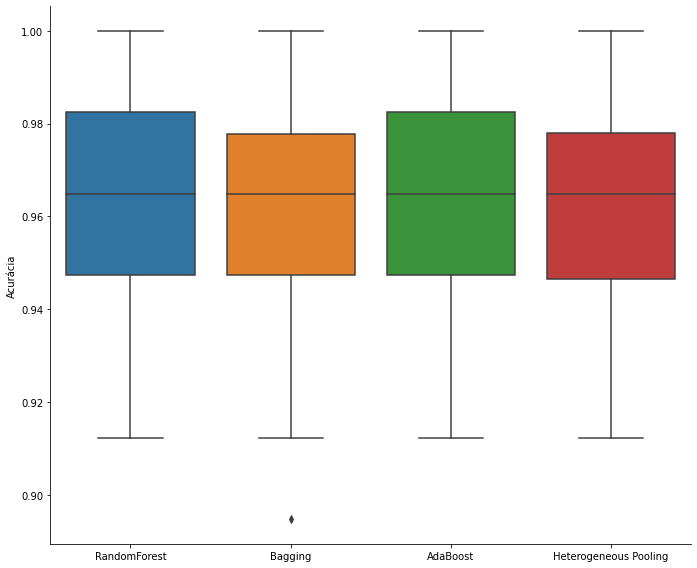

In [15]:
import seaborn as sns
import pandas as pd

scores = pd.DataFrame(data={'RandomForest': rf.getScores(),
                            'Bagging': bagging.getScores(),
                            'AdaBoost': adaBoost.getScores(),
                            'Heterogeneous Pooling': heterogeneousPooling.getScores()})
ax = sns.catplot(data=scores, kind="box", height=8, aspect=1.2)
ax.set(ylabel='Acurácia')

### Testes de hipótese

In [17]:
from scipy.stats import ttest_rel, wilcoxon
import pandas as pd

labels = ['Bagging', 'AdaBoost', 'RandomForest', 'Heterogeneous']
models = [bagging.getScores(), adaBoost.getScores(), rf.getScores(), heterogeneousPooling.getScores()]
p_table = pd.DataFrame(index=range(4),columns=range(4))

for i in range(4):
    for j in range(4):
        if i == j:
            p_table.loc[i, j] = labels[i]
        elif j > i:
            _, p = ttest_rel(models[i], models[j])
            p_table.loc[i, j] = p
        else:
            _, p = wilcoxon(models[i], models[j])
            p_table.loc[i, j] = p
            
p_table.style.applymap(lambda v: '' if type(v) == str or v >= 0.05 else 'font-weight: bold').hide_index()

0,1,2,3
Bagging,0.007077,0.420025,0.664886
0.006620,AdaBoost,0.030175,0.027835
0.350112,0.053309,RandomForest,0.873155
0.543010,0.041989,0.882257,Heterogeneous
